In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
metrics_path = "/content/drive/MyDrive/Paraphrasing API/training_results/ruslan-t5-small-combined-reduced_v1/metrics.json"

In [4]:
with open(metrics_path) as file:
    metrics = json.load(file)
epochs = range(0, len(metrics["bleu"]))

In [5]:
reference_based = ["bleu", "gleu"]
diversity = ["bleu_output_input", 'gleu_output_input', 'bleu_diversity', 'intersection_over_union', 'char_ngram_overlap']
bleurt = "bleurt"
berts = ['bert_f1', "bert_precision", "bert_recall"]
rouge_metrics = [ridge_name for ridge_name in metrics.keys() if "rouge" in ridge_name]

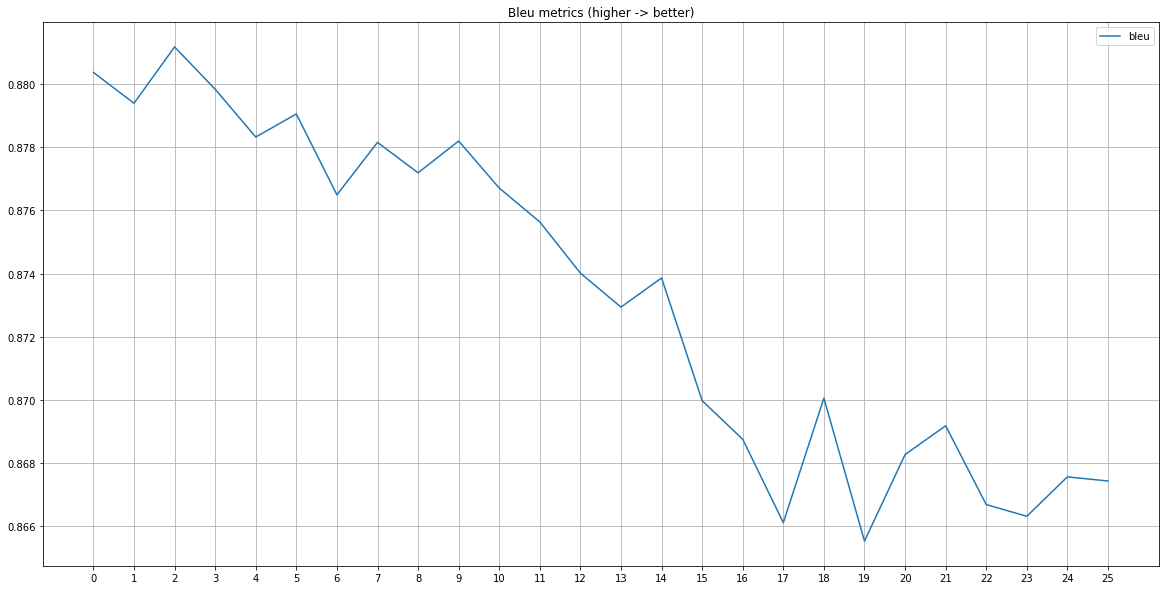

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(epochs, metrics["bleu"], label="bleu")
plt.title("Bleu metrics (higher -> better)")
plt.grid(True)
plt.xticks(epochs)
plt.legend()

Text(0.5, 1.0, 'Gleu metrics (higher -> better)')

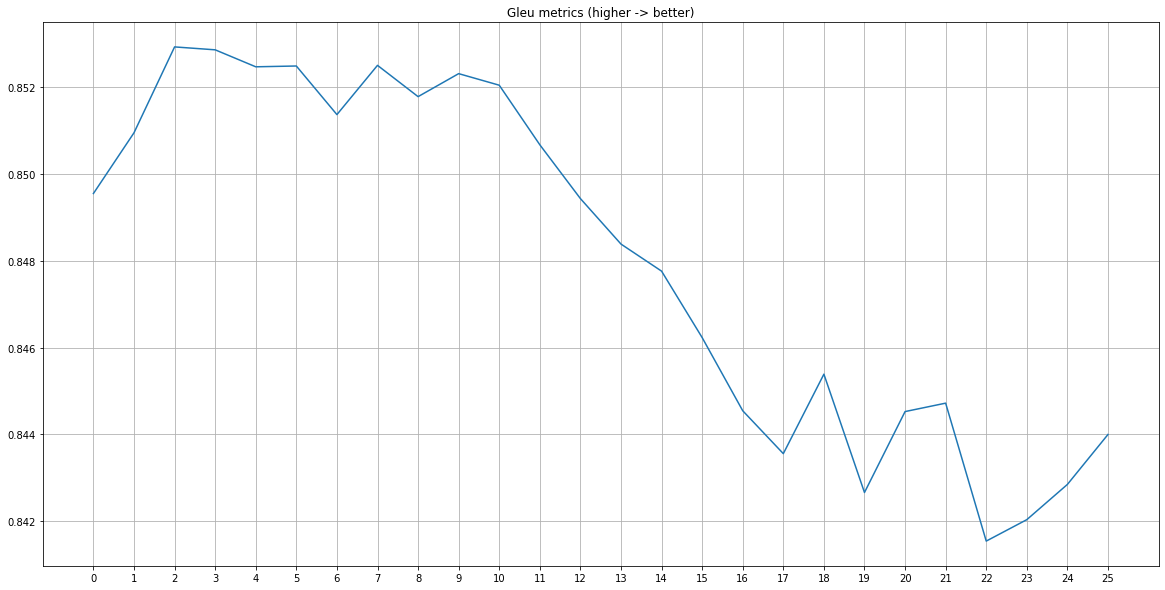

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(epochs, metrics["gleu"])
plt.grid(True)
plt.xticks(epochs)
plt.title("Gleu metrics (higher -> better)")

Text(0.5, 1.0, 'Ridge (higher -> better)')

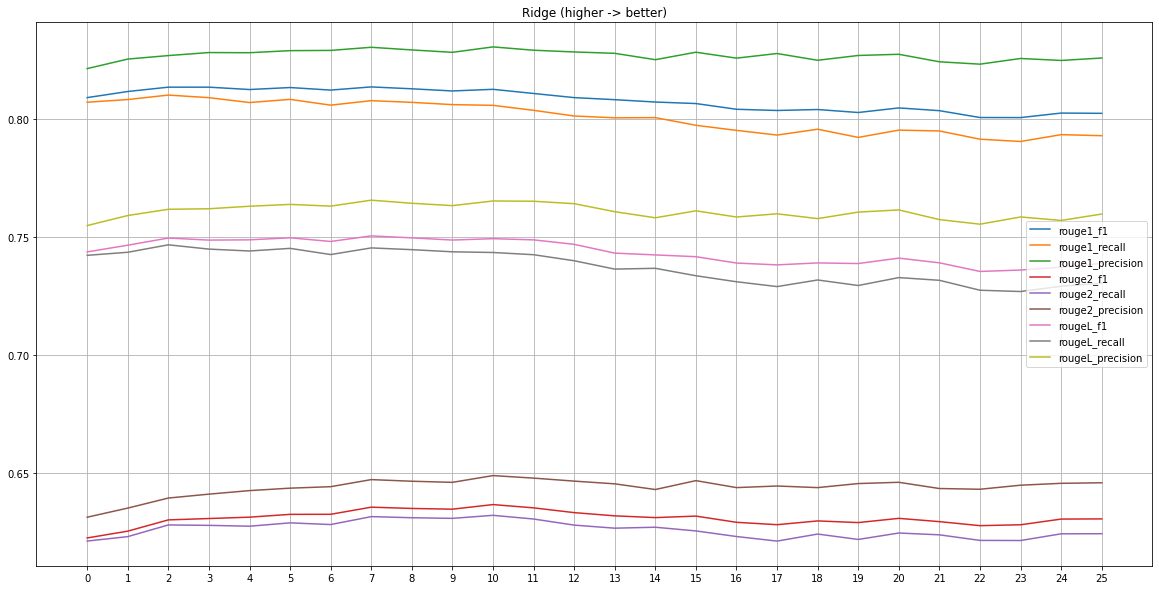

In [8]:
plt.figure(figsize=(20, 10))
for key, values in metrics.items():
    if key in rouge_metrics:
        plt.plot(epochs, values, label=key)
plt.legend()
plt.grid()
plt.xticks(epochs)
plt.title("Ridge (higher -> better)")

Text(0.5, 1.0, 'Diversity metrics (lower -> better)')

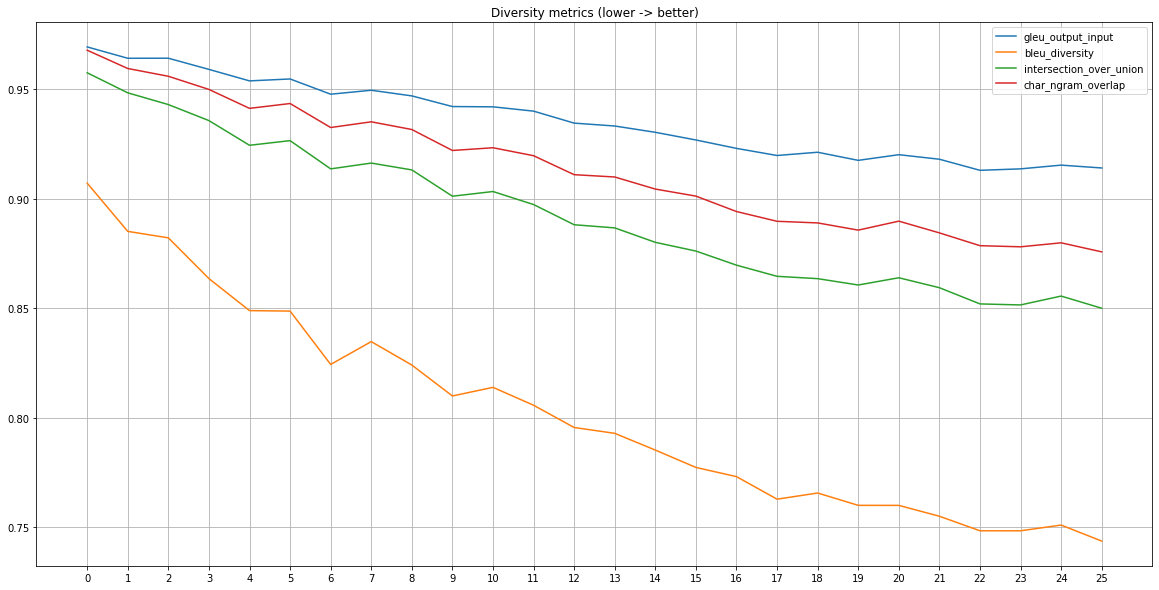

In [9]:
plt.figure(figsize=(20, 10))
for key, values in metrics.items():
    if key in diversity and key != "bleu_output_input":
        plt.plot(epochs, values, label=key)
plt.legend()
plt.grid()
plt.xticks(epochs)
plt.title("Diversity metrics (lower -> better)")

Text(0.5, 1.0, 'Bleurt (higher -> better)')

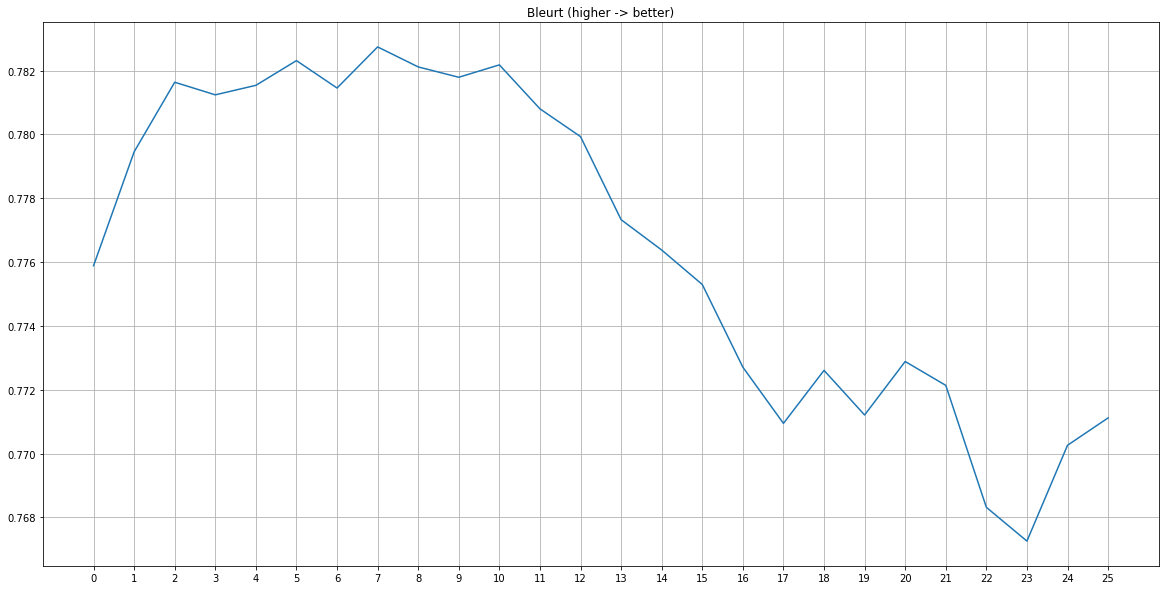

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(epochs, metrics[bleurt])
plt.grid()
plt.xticks(epochs)
plt.title("Bleurt (higher -> better)")

Text(0.5, 1.0, 'Berts (higher -> better)')

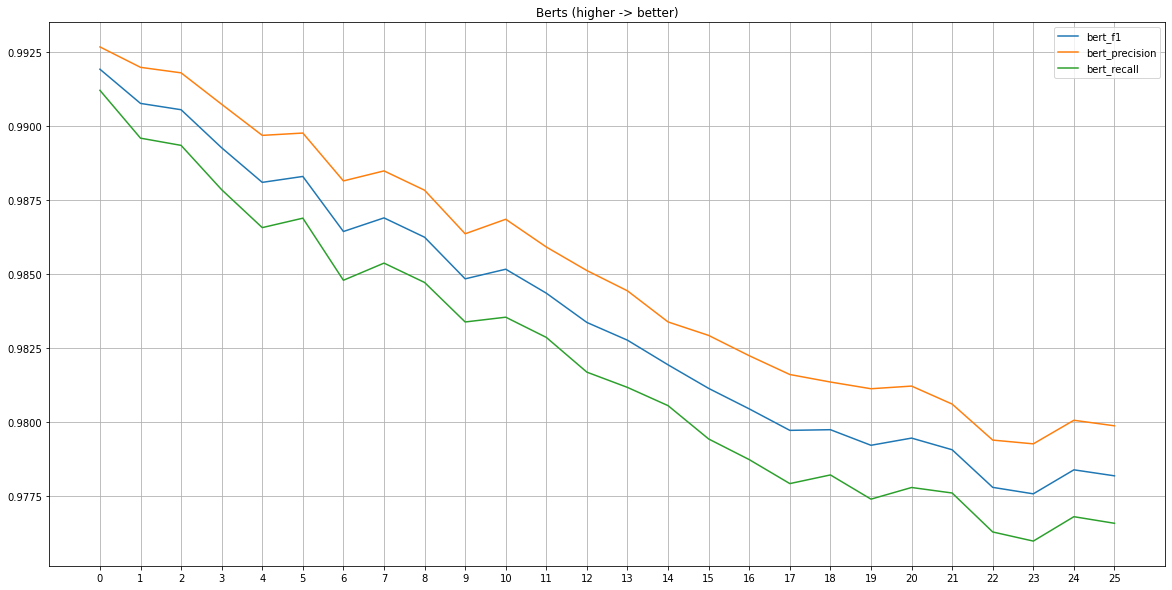

In [11]:
plt.figure(figsize=(20, 10))
epochs = range(0, len(metrics["bleu"]))
for key, values in metrics.items():
    if key in berts:
        plt.plot(epochs, values, label=key)
plt.legend()
plt.grid()
plt.xticks(epochs)
plt.title("Berts (higher -> better)")